# **1. Configuración del Ambiente**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'
print('------')
!pip show yfinance | grep 'Name\|Version'
#Quizás falta instalar alguna librería

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.22.4
------
Name: matplotlib
Version: 3.7.1
------
Name: yfinance
Version: 0.2.18


# **2. Obtención de Datos**

In [55]:
#Obtenemos el ticker de bitcoin a btc
btc = yf.Ticker("BTC-USD")

In [56]:
#obtenemos los valores de bitcoin en intervalos de 5 minutos de los últimos 7 días en un df
from datetime import date, timedelta, datetime
import pytz

hora_santiago = pytz.timezone('Chile/Continental')
semana_pasada = datetime.now(tz = hora_santiago) - timedelta(days = 7)
semana_pasada = semana_pasada.strftime('%Y-%m-%d')

def importar_base_bitcoin():
  global df_bitcoin
  df_bitcoin =  btc.history(period = '1mo', interval = '5m', start = semana_pasada)
  df_bitcoin = df_bitcoin.sort_values(by = ['Datetime'], ascending = False)

  print(df_bitcoin)

importar_base_bitcoin()
type(df_bitcoin)

                                   Open          High           Low  \
Datetime                                                              
2023-06-16 05:05:00+00:00  25495.199219  25507.937500  25483.513672   
2023-06-16 05:00:00+00:00  25506.373047  25510.796875  25496.123047   
2023-06-16 04:55:00+00:00  25516.722656  25516.722656  25508.546875   
2023-06-16 04:50:00+00:00  25520.007812  25520.978516  25518.109375   
2023-06-16 04:45:00+00:00  25515.648438  25519.939453  25515.648438   
...                                 ...           ...           ...   
2023-06-09 00:20:00+00:00  26489.691406  26494.298828  26453.910156   
2023-06-09 00:15:00+00:00  26500.650391  26500.650391  26486.505859   
2023-06-09 00:10:00+00:00  26477.306641  26502.650391  26473.429688   
2023-06-09 00:05:00+00:00  26514.253906  26514.253906  26479.115234   
2023-06-09 00:00:00+00:00  26505.923828  26516.607422  26504.337891   

                                  Close    Volume  Dividends  Stock Splits  

pandas.core.frame.DataFrame

In [57]:
# definir función extraer_tendencias y extraer la cadena html con el precio del bitcoin
import requests
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

def extraer_tendencias():
  url = 'https://coinmarketcap.com'
  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
  req = requests.get(url, headers = headers)

  s = BeautifulSoup(req.content, features ='lxml')

  req =  s.findAll('div', {'class':['sc-bc83b59-0 iVdfNf','sc-bc83b59-0 iVdfNf rise', 'sc-bc83b59-0 iVdfNf fall']})

  for item in req[0]:
    req = item
    print(req)

  #limpiar la cadena encontrada para obtener únicamente el valor del bitcoin

  span = req.find('span')
  global precio_actual
  precio_actual = span.text
  precio_actual = precio_actual.replace('$',"").replace(",","")
  precio_actual = float(precio_actual)
  print(precio_actual)

  global tendencia
  tendencia = ''
  icon_caret_criptos = s.findAll('span', {'class':['sc-97d6d2ca-0 cYiHal','sc-97d6d2ca-0 bQjSqS']})
  icon_caret_criptos = icon_caret_criptos[0]
  icon_caret_criptos = icon_caret_criptos.span['class']
  if icon_caret_criptos == 'icon-Caret-down':
    tendencia = 'baja'
  else:
    tendencia = 'alta'
  print(precio_actual, tendencia)
extraer_tendencias()

<a class="cmc-link" href="/currencies/bitcoin/markets/"><span>$25,507.94</span></a>
25507.94
25507.94 alta


# **3. Limpieza de Datos**

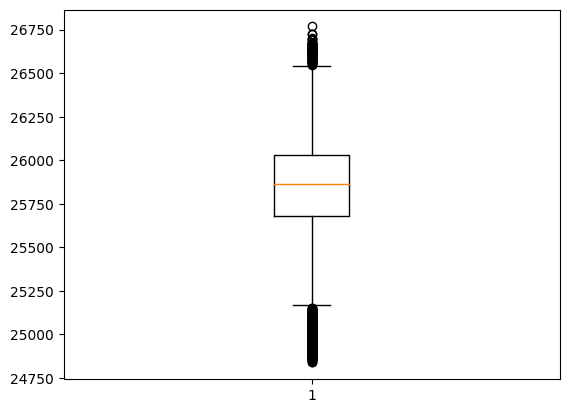

25845.4
25823.31


In [58]:
from csv import QUOTE_NONNUMERIC
def limpieza_datos():
  media_df_bitcoin = round(df_bitcoin.Close.mean(),2)
  df_bitcoin_limpio = df_bitcoin
  df_bitcoin_limpio.head(10)
  type(df_bitcoin_limpio)
  df_bitcoin_limpio['Close']
  df_bitcoin_limpio = df_bitcoin_limpio.drop_duplicates()
  df_bitcoin_limpio = df_bitcoin_limpio.dropna(subset = ['Close'])
  df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio.Volume > 0]
  df_bitcoin_limpio = df_bitcoin_limpio.reset_index()
  fig, ax = pltp.subplots()
  ax.boxplot(df_bitcoin['Close'])
  pltp.show()
  cuartiles = df_bitcoin_limpio['Close']
  Q1 = cuartiles.quantile(.25)
  Q3 = cuartiles.quantile(.75)
  df_bitcoin_normalizado = (cuartiles >= Q1) & (cuartiles <= Q3)
  df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_normalizado]
  global media_bitcoin
  media_bitcoin = round(df_bitcoin_limpio.Close.mean(),2)
  print(media_df_bitcoin)
  print(media_bitcoin)
limpieza_datos()

# **4. Tomar Decisiones**

In [59]:
def tomar_decisiones():
  if ((precio_actual >= media_bitcoin) and (tendencia == 'baja')):
    algoritmo_decision = 'Sell'
    color = '#fc0505'
  elif ((precio_actual < media_bitcoin) and (tendencia == 'alta')):
    algoritmo_decision = 'Buy'
    color = '#00d600'
  else:
    algoritmo_decision = 'Hold'
    color = '#e3d005'

  print('El precio promedio de Bitcoin es: ', media_bitcoin)
  print('Y el precio actual de Bitcoin es: ', precio_actual)
  print('Además, su tendencia es: ', tendencia)
  print('Por lo tanto, la decisión del algoritmo es: ', algoritmo_decision)
tomar_decisiones()

El precio promedio de Bitcoin es:  25823.31
Y el precio actual de Bitcoin es:  25507.94
Además, su tendencia es:  alta
Por lo tanto, la decisión del algoritmo es:  Buy


# **5. Visualización**

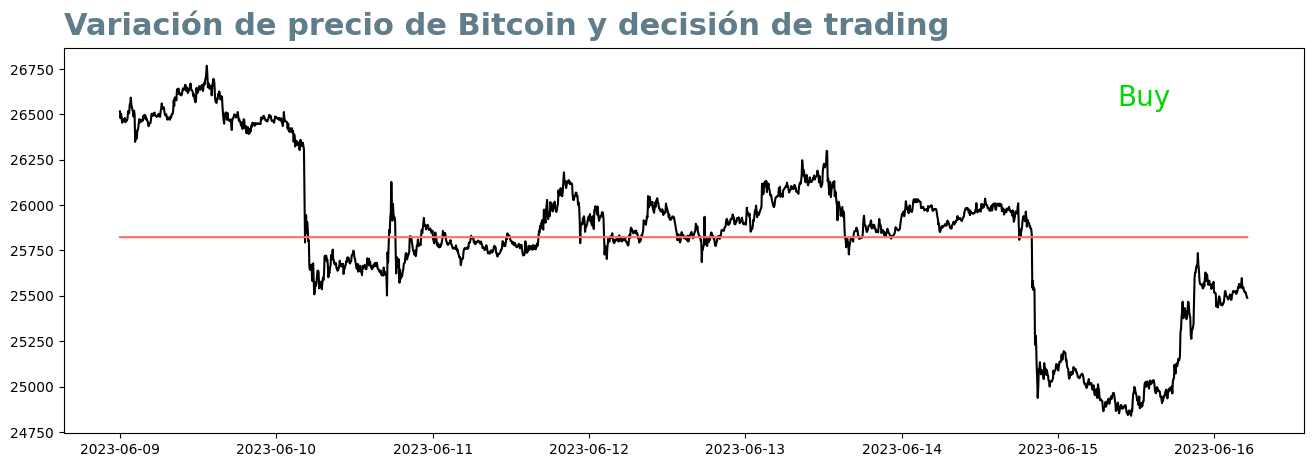

Tendencia:  alta


In [60]:
def visualizacion():
  df_bitcoin['Promedio'] = media_bitcoin
  plt.figure(figsize=((16,5)))
  plt.title('Variación de precio de Bitcoin y decisión de trading', loc='left', fontsize=22, color='#607d8b', fontweight="bold", pad = 10)
  plt.plot(df_bitcoin.index, df_bitcoin['Close'], color='#000000')
  plt.plot(df_bitcoin.index, df_bitcoin['Promedio'], color='#ff6f69')
  plt.annotate(algoritmo_decision, xy=(0.85, 0.85), xycoords='axes fraction', fontsize=20, color=color)
  plt.show()

  print('Tendencia: ', tendencia)
visualizacion()

# **6. Automatización**

                                   Open          High           Low  \
Datetime                                                              
2023-06-16 05:10:00+00:00  25474.900391  25474.900391  25474.900391   
2023-06-16 05:05:00+00:00  25495.199219  25507.937500  25483.513672   
2023-06-16 05:00:00+00:00  25506.373047  25510.796875  25496.123047   
2023-06-16 04:55:00+00:00  25516.722656  25516.722656  25508.546875   
2023-06-16 04:50:00+00:00  25520.007812  25520.978516  25518.109375   
...                                 ...           ...           ...   
2023-06-09 00:20:00+00:00  26489.691406  26494.298828  26453.910156   
2023-06-09 00:15:00+00:00  26500.650391  26500.650391  26486.505859   
2023-06-09 00:10:00+00:00  26477.306641  26502.650391  26473.429688   
2023-06-09 00:05:00+00:00  26514.253906  26514.253906  26479.115234   
2023-06-09 00:00:00+00:00  26505.923828  26516.607422  26504.337891   

                                  Close    Volume  Dividends  Stock Splits  

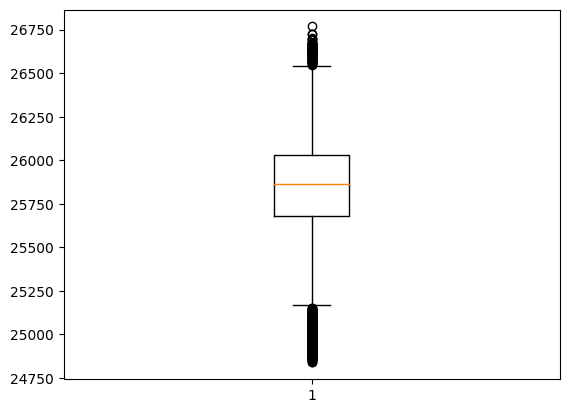

25845.22
25823.31
El precio promedio de Bitcoin es:  25823.31
Y el precio actual de Bitcoin es:  25507.94
Además, su tendencia es:  alta
Por lo tanto, la decisión del algoritmo es:  Buy


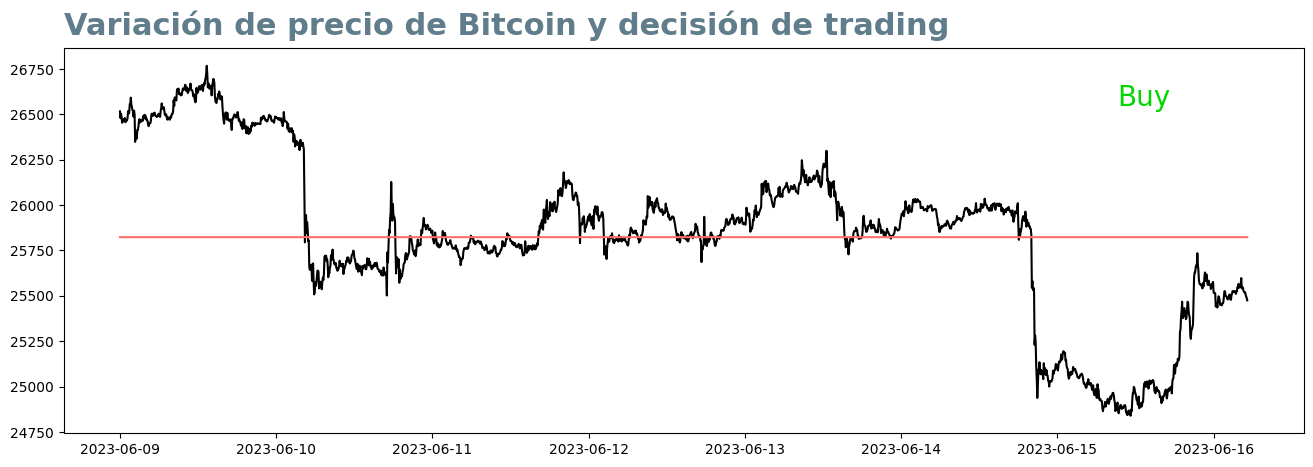

Tendencia:  alta


KeyboardInterrupt: ignored

In [61]:
from IPython.display import clear_output
import time
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)